Building a new plot
-----------

**Following this guide**, you will create a new plot in no time. Remember to check the [introduction notebook to the framework](../basic-tutorials/Demo.ipynb) to understand that:
- Your plot will support multiple plotting backends.
- Your plot will only recompute what is needed when its inputs are updated.

Let's get started!

## The tools

We provide you with a set of tools to create plots. The most basic ones are two of them: `get_figure` and `plot_actions`.

In [1]:
from sisl.viz import get_figure, plot_actions

They are what support the multibackend framework. Let's try them out:

In [2]:
# We create an action.
action = plot_actions.draw_line(x=[1, 2], y=[3, 4], line={"color": "red"})

# And then we plot it in a figure
get_figure(backend="plotly", plot_actions=[action])

Simple, isn't it?

As you might have imagined, we can ask for a matplotlib figure:

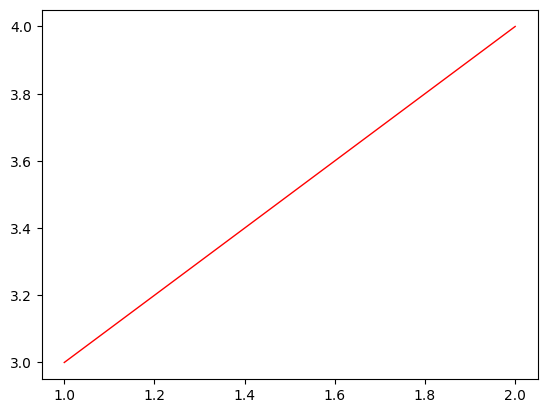

In [3]:
get_figure(backend="matplotlib", plot_actions=[action])

## A plot function

It now feels reasonable to pack this very cool implementation this into a function.

In [4]:
def a_cool_plot(color="red", backend="plotly"):
    action = plot_actions.draw_line(x=[1, 2], y=[3, 4], line={"color": color})

    return get_figure(backend=backend, plot_actions=[action])

And just like that, **you have your multi framework plot function**. It would be a shame to leave it unused.

In [5]:
a_cool_plot(color="green")

What is there left to do then? Remember that we wanted our plot to be a workflow, and currently it isn't.

## From function to `Plot`

To convert our function to a workflow, we need to introduce a new tool, `Plot`:

In [6]:
from sisl.viz import Plot

It is just an extension of sisl's `Workflow` class (see `sisl.nodes` documentation), so creating a `Plot` from a function is straightforward:

In [7]:
CoolPlot = Plot.from_func(a_cool_plot)

Let's now visualize our workflow!

In [8]:
CoolPlot.network.visualize(notebook=True)

There we go, our first multi-backend, updatable `Plot` :)

Let's use it:

In [9]:
plot = CoolPlot(color="blue")
plot

INFO	Task(Task-3) nodify.node.139876113869248:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876113869104:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876113869776:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876113870832:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876113870496:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876113871024:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876115815104:node.py:get()- Evaluated because inputs changed.


And now, the moment we've all been waiting for. Let's update our plot: 

INFO	Task(Task-3) nodify.node.139876113869248:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876113869104:node.py:get()- No need to evaluate


INFO	Task(Task-3) nodify.node.139876113869776:node.py:get()- No need to evaluate


INFO	Task(Task-3) nodify.node.139876113870832:node.py:get()- No need to evaluate


INFO	Task(Task-3) nodify.node.139876113870496:node.py:get()- No need to evaluate


INFO	Task(Task-3) nodify.node.139876113871024:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876115815104:node.py:get()- Evaluated because inputs changed.


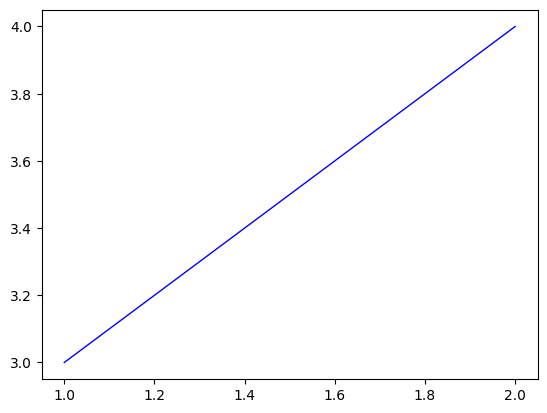

In [10]:
plot.update_inputs(backend="matplotlib")

Additional methods
------

It might be useful sometimes to provide helper methods so that the users can interact quickly with your plot. E.g. to change inputs or to extract some information from it.

In that case, you'll just have to define the plot class with `class` syntax and write the methods as you always do:

In [11]:
class CoolPlot(Plot):
    # The function that this workflow will execute
    function = staticmethod(a_cool_plot)

    # Additional methods.
    def color_like(self, object):
        """Uses the latest AI to change the color of the plot matching a given object"""

        color = None
        if object == "sun":
            color = "orange"
        elif object == "grass":
            color = "green"
        else:
            raise ValueError(f"The AI could not determine the color of {color}")

        return self.update_inputs(color=color)

And then you just use it as you would expect:

In [12]:
plot = CoolPlot()
plot

INFO	Task(Task-3) nodify.node.139876114215472:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876114218976:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876112444704:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876112448640:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876112436256:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876112446000:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876112439904:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876114215472:node.py:get()- No need to evaluate


INFO	Task(Task-3) nodify.node.139876114218976:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876112444704:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876112448640:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876112436256:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876112446000:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-3) nodify.node.139876112439904:node.py:get()- Evaluated because inputs changed.


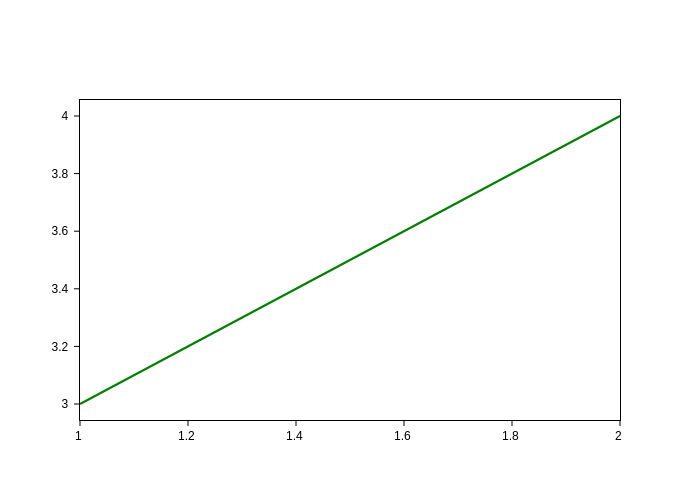

In [13]:
plot.color_like("grass").show("png")

Complex plots
-------------

As you probably have noticed, you can go as complex as you wish inside your plot function. If you want to convert it to a `Plot` however, it is important that you encapsulate sub-functionalities into separate functions so that the workflow doesn't become to complex, storing useless data and adding too much overhead (this is generic advice for `Workflow`s).

In `sisl.viz`, you will find plenty of helper functions, specially in `sisl.viz.processors`, that you might benefit from. You might want to check the already implemented plots in `sisl.viz.plots` for inspiration.